# 🧠 Brain Tumor Detection Using CNN (MRI Classification)

#### Step 1: Import Required Libraries

In [1]:
import os # To access and manage file directories, useful for navigating through MRI image folders.
import cv2 # Used for reading and preprocessing image files (e.g., resizing, grayscale conversion).
import numpy as np # Used for reading and preprocessing image files (e.g., resizing, grayscale conversion).
from PIL import Image # Provides additional image manipulation functionality, especially format conversion.
import tensorflow as tf # Main deep learning framework used to build and train the CNN model.
from tensorflow.keras.utils import normalize # 	To scale pixel values between 0 and 1, improving training efficiency.
from sklearn.model_selection import train_test_split # To divide the dataset into training and testing sets for model validation.
from tensorflow.keras.models import Sequential # Allows the creation of a simple sequential CNN architecture layer by layer.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 
# Key CNN components: convolution, pooling, activation functions, dropout for regularization, flattening, and dense layers for classification.

#### Step 2: Load Dataset

In [5]:
import os # Used to interact with the file system and manage paths.
print(os.getcwd()) 	# Printed the current working directory to verify that it points to the dataset folder.

C:\Users\AMD


In [6]:
print("Current Directory:", os.getcwd()) # Printed the current working directory to verify initial script location.

Current Directory: C:\Users\AMD


In [10]:
os.chdir(r"D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets")
# Changed the working directory to the dataset folder.

In [12]:
print("Current Directory:", os.getcwd()) # Verified the change to ensure the correct path is active.

Current Directory: D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets


In [14]:
image_directory = r'D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets\\'
# Defined the base path for accessing the 'yes' and 'no' image folders.
no_tumor_images = os.listdir(image_directory + 'no/') # Loaded file names of all MRI images labeled as "no tumor".
yes_tumor_images = os.listdir(image_directory + 'yes/') # Loaded file names of all MRI images labeled as "tumor present".


#### Step 3: Image Preprocessing and Label Assignment

In [16]:
INPUT_SIZE = 64  # Set image size here

# I reset both lists to store MRI image data and their corresponding labels.
dataset = [] 
labels = []

for image_name in no_tumor_images: # I started looping through all the 'no tumor' images.
    if image_name.endswith('.jpg'): # Ensured only JPEG images are processed.
        img_path = os.path.join(image_directory, 'no', image_name) # Constructed the full path for each 'no tumor' image.
        img_cv = cv2.imread(img_path) # Loaded the image using OpenCV.
        if img_cv is not None: # Checked for any corrupted or unreadable images.
            img = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)) # Converted image from BGR to RGB using PIL.
            img = img.resize((INPUT_SIZE, INPUT_SIZE)) # Resized the image to match the CNN input dimensions.
            dataset.append(np.array(img)) # Added the processed image (as a NumPy array) to the dataset list.
            labels.append(0) # Appended label 0 for images with no tumor.


In [17]:
# I made sure dataset is still a list
if not isinstance(dataset, list): # Ensured dataset remains a list before continuing.
    dataset = list(dataset)


for image_name in yes_tumor_images: # I looped through all 'yes tumor' images and processed each one
    if image_name.endswith('.jpg'): # Processed only .jpg format files.
        img_path = os.path.join(image_directory, 'yes', image_name) # Constructed path for each 'yes tumor' image.
        img_cv = cv2.imread(img_path) # 	Loaded each tumor image using OpenCV.
        if img_cv is not None: # 	Skipped any unreadable files.
            
            # I converted the BGR image from OpenCV to RGB format
            img = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
            
            # I resized the image to match the input size expected by the model
            img = img.resize((INPUT_SIZE, INPUT_SIZE))
            
            # I converted the image to a NumPy array and added it to the dataset
            dataset.append(np.array(img))
            
            # I added the label '1' for 'yes tumor'
            labels.append(1)

#### Step 4: Data Preprocessing

In [19]:
# 3. Data Preprocessing

# I converted the dataset and labels lists into NumPy arrays for efficient computation
dataset = np.array(dataset)
labels = np.array(labels)

# I split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=0)

# I normalized the image pixel values to scale them between 0 and 1 for better model performance
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)


#### Step 5: Build CNN Model

In [22]:
# 4. Build CNN Model

from tensorflow.keras.layers import Input

# I initialized a Sequential model
model = Sequential()

# I added an Input layer with the shape matching the resized images
model.add(Input(shape=(INPUT_SIZE, INPUT_SIZE, 3)))

# I added the first convolutional block: Conv -> ReLU -> MaxPooling
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# I added the second convolutional block with He uniform initialization
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# I added the third convolutional block with more filters
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# I flattened the output and added a dense layer with dropout for regularization
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# I added the final output layer with sigmoid activation for binary classification
model.add(Dense(1))
model.add(Activation('sigmoid'))


##### Step 6: Compile the Model

In [25]:
# 5. Compile Model

# I compiled the CNN model using binary crossentropy since it's a binary classification task
# I chose the Adam optimizer for efficient training
# I also tracked accuracy as a performance metric

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### Step 7: Train the Model

In [30]:
# 6. Train Model

# I trained the CNN model using my training dataset
# I used a batch size of 16 and trained it for 10 epochs
# I reserved 10% of the training data for validation during training
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_split=0.1)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7402 - loss: 0.5548 - val_accuracy: 0.8465 - val_loss: 0.4018
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9001 - loss: 0.2764 - val_accuracy: 0.9309 - val_loss: 0.1756
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9468 - loss: 0.1521 - val_accuracy: 0.9540 - val_loss: 0.1415
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9727 - loss: 0.0979 - val_accuracy: 0.9437 - val_loss: 0.1856
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9755 - loss: 0.0705 - val_accuracy: 0.9591 - val_loss: 0.1504
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9898 - loss: 0.0398 - val_accuracy: 0.9642 - val_loss: 0.1081
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9908 - loss: 0.0362 - val_accuracy: 0.9719 - val_loss: 0.1065
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9899 - loss: 0.0310 - val_accu

#### Step 8: Evaluate the Model

In [33]:
# 7. Evaluate the model on the test data

# I evaluated the trained model on the test set to check its performance on unseen data
loss, accuracy = model.evaluate(x_test, y_test)

# I printed the test accuracy as a percentage with two decimal places
print(f"Test Accuracy: {accuracy*100:.2f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9771 - loss: 0.1157
Test Accuracy: 97.55%


#### Step 9: Save the Model

In [36]:
# 8. Save Model

# I saved the trained CNN model to a file named 'brain_tumor_cnn_model.keras'
model.save("brain_tumor_cnn_model.keras")

# I printed a confirmation message to indicate successful saving
print("Model successfully saved!")

Model successfully saved!


#### Step 10: Load the Model

In [39]:
# 9. Load Model

from tensorflow.keras.models import load_model
import numpy as np

# I loaded the saved CNN model from the file
model = load_model("brain_tumor_cnn_model.keras")

# I printed a confirmation message to verify the model loaded correctly
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


#### Step 11: Make a Prediction with the Model

In [41]:
# I created a dummy input with the same shape as the model expects (1 image, 64x64 pixels, 3 color channels)
dummy_input = np.random.rand(1, 64, 64, 3)

# I ran the model’s prediction on the dummy input
prediction = model.predict(dummy_input)

# I printed the raw prediction output
print("Prediction output:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediction output: [[0.30808]]


In [43]:
# I interpreted the prediction score as 'Tumor' or 'No Tumor'
if prediction[0][0] > 0.5:
    print("Model Prediction: Tumor")
else:
    print("Model Prediction: No Tumor")

Model Prediction: No Tumor


In [45]:
from tensorflow.keras.models import load_model
import numpy as np

In [47]:
# Model Load
model = load_model("brain_tumor_cnn_model.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


#### Step 12: Analyze Training Performance (Check for Overfitting)

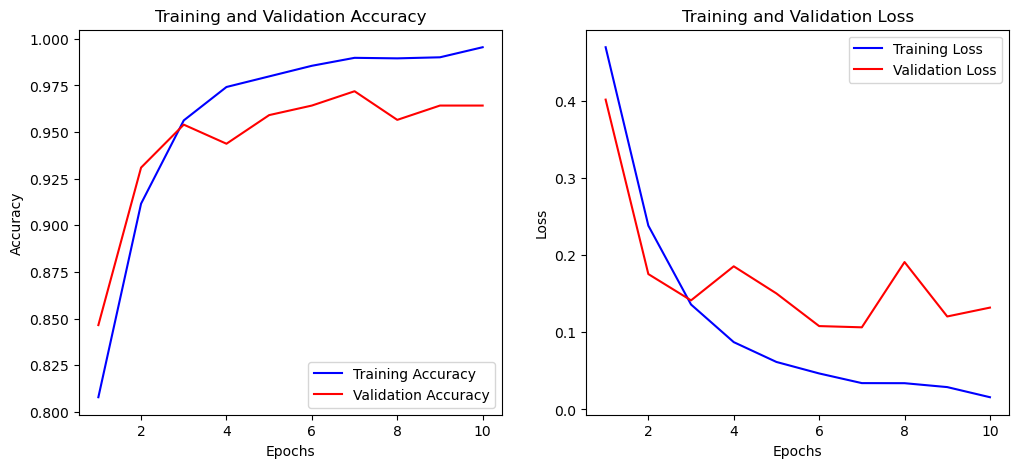

In [53]:
import matplotlib.pyplot as plt

# I extracted accuracy and loss for both training and validation from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# I plotted training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# I plotted training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### Step 13: Plot Accuracy and Loss Graphs

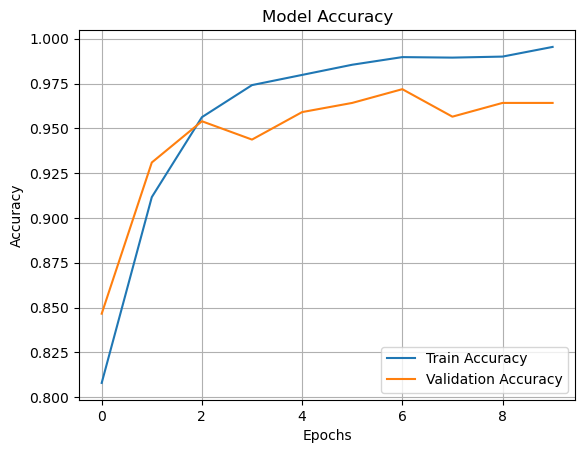

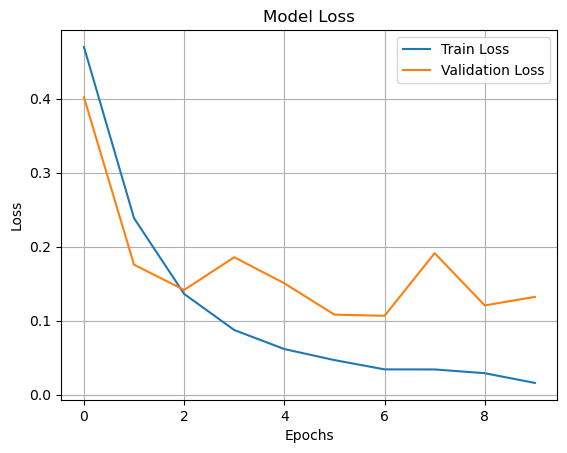

In [57]:
import matplotlib.pyplot as plt

# I plotted training and validation accuracy over epochs to see how well my model learned
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# I plotted training and validation loss over epochs to check if my model was overfitting or underfitting
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### 🧪 Step 14: Evaluate on Test Set (Again)

In [61]:
# I evaluated my trained model on the separate test dataset to check its real-world performance
loss, accuracy = model.evaluate(x_test, y_test)

# I printed the test accuracy percentage
print(f"Test Accuracy: {accuracy * 100:.2f}%")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9771 - loss: 0.1157
Test Accuracy: 97.55%


#### Step 15: Data Augmentation

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# I created an ImageDataGenerator with augmentations like rotation, zoom, shifts, and horizontal flips
datagen = ImageDataGenerator(
    rotation_range=20,        # I let images rotate up to 20 degrees randomly
    zoom_range=0.15,          # I randomly zoom images by up to 15%
    width_shift_range=0.1,    # I shift images horizontally by up to 10%
    height_shift_range=0.1,   # I shift images vertically by up to 10%
    horizontal_flip=True,     # I randomly flip images horizontally
)

# I fit the augmentation generator on my training data
datagen.fit(x_train)

#### Step 16: Check Class Balance

In [67]:
from sklearn.utils import class_weight
import numpy as np

# I computed class weights to handle any imbalance in my training labels
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# I printed the class weights to see the relative importance for each class
print("Class weights:", class_weights)


Class weights: [1.5615016  0.73551543]


#### Step 17: Confusion Matrix & Metrics

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# I used the trained model to predict on the test set
y_pred = model.predict(x_test)

# I converted the predicted probabilities to binary labels (0 or 1) using 0.5 threshold
y_pred = (y_pred > 0.5).astype("int32")

# I printed the confusion matrix to see true positives, false positives, true negatives, and false negatives
print(confusion_matrix(y_test, y_pred))

# I printed a detailed classification report with precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[312  16]
 [  8 642]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       328
           1       0.98      0.99      0.98       650

    accuracy                           0.98       978
   macro avg       0.98      0.97      0.97       978
weighted avg       0.98      0.98      0.98       978



In [72]:
from tensorflow.keras.models import load_model
import numpy as np

In [74]:
# Model Load
model = load_model("brain_tumor_cnn_model.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


### Step 18: Retrain with Augmentation

In [78]:
# Instead of model.fit(), use .flow() to get augmented data batches

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=16),
    steps_per_epoch=len(x_train) // 16,
    epochs=10,
    validation_data=(x_test, y_test)
)



Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8453 - loss: 0.4400 - val_accuracy: 0.9724 - val_loss: 0.0705
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.1395 - val_accuracy: 0.9724 - val_loss: 0.0724
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9211 - loss: 0.2114 - val_accuracy: 0.9796 - val_loss: 0.0704
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0651 - val_accuracy: 0.9775 - val_loss: 0.0683
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9376 - loss: 0.1594 - val_accuracy: 0.9775 - val_loss: 0.0656
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.6397 - val_accuracy: 0.9755 - val_loss: 0.0635
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9506 - loss: 0.1342 - val_accuracy: 0.9826 - val_loss: 0.0488
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.2271 - val_accuracy

### Step 19: Build a Prediction Pipeline

In [81]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("brain_tumor_cnn_model.keras")

# Set the base directory for my dataset
base_dir = r"D:\Software\For Other\AI\Data Science\Data\Folder wise\Deep Learning Project\Brain Tumor Image Classification\datasets"

# I chose the image I want to predict (change the path as needed)
image_path = os.path.join(base_dir, "yes", "1.jpg")

def predict_image(image_path):
    if not os.path.exists(image_path):
        print(f"❌ File does not exist: {image_path}")
        return
    
    # Load the image with OpenCV and convert color to RGB
    img_cv = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # Resize image to 64x64 (input size for the model)
    img_resized = cv2.resize(img_rgb, (64, 64))

    # Normalize pixel values
    img_normalized = img_resized / 255.0

    # Add batch dimension
    img_input = np.expand_dims(img_normalized, axis=0)

    # Get prediction from the model
    prediction = model.predict(img_input)[0][0]

    # Decide label and confidence
    label = "Tumor" if prediction > 0.5 else "No Tumor"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"🧠 Prediction: {label}")
    print(f"✅ Confidence: {confidence:.2f}")

# Run my prediction
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
🧠 Prediction: Tumor
✅ Confidence: 1.00
